In [3]:
import matplotlib.pyplot as plt
import pandas as pd
from scipy.io import mmread
import pandas as pd
from scipy.sparse import csr_matrix
import numpy as np
import scanpy as sc

In [ ]:
!tar -xf /content/pbmc4k_filtered_gene_bc_matrices.tar.gz

In [62]:
mtx = mmread('/content/filtered_gene_bc_matrices/GRCh38/matrix.mtx').tocsr()
dense = mtx.toarray().T

In [63]:
dense

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [65]:
# (cells, genes)
dense.shape

(4340, 33694)

# Question 1

## Q1a.
Load the above data and construct a dense matrix of genes by cells from the sparse list
format. What is the size (shape) of this matrix, how many cells and genes are detected? [5 pts]

A count matrix is a table of numbers where rows typically represent features (like genes) and columns represent samples, with each cell's value indicating the number of times a particular feature was detected or quantified in a specific sample. It's a fundamental output in RNA sequencing (RNA-seq) and single-cell RNA sequencing (scRNA-seq), where the "counts" are derived from sequencing reads mapped to genes or other biological features.

In [322]:
# Define file paths
matrix_file = '/content/filtered_gene_bc_matrices/GRCh38/matrix.mtx'
barcodes_file = '/content/filtered_gene_bc_matrices/GRCh38/barcodes.tsv'
genes_file = '/content/filtered_gene_bc_matrices/GRCh38/genes.tsv'

In [323]:
# Read the MTX file
mtx = mmread(matrix_file).tocsr()
# Convert to CSR matrix
dense = mtx.toarray().T
dense

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [324]:
# Read barcodes and features
barcodes = pd.read_csv(barcodes_file, sep='\t', header=None)
genes = pd.read_csv(genes_file, sep='\t', names=["ID", "Name"], header=None) # Assuming gene names are in the second column

In [325]:
# You now have the dense matrix, barcodes, and genes for further analysis
print("Dense matrix shape:", dense.shape)
print("Number of cells:", barcodes.shape)
print("Number of genes:", genes.shape)

Dense matrix shape: (4340, 33694)
Number of cells: (4340, 1)
Number of genes: (33694, 2)


In [326]:
barcodes.head()

,0
0,AAACCTGAGAAGGCCT-1
1,AAACCTGAGACAGACC-1
2,AAACCTGAGATAGTCA-1
3,AAACCTGAGCGCCTCA-1
4,AAACCTGAGGCATGGT-1


In [327]:
genes.head()

,ID,Name
0,ENSG00000243485,RP11-34P13.3
1,ENSG00000237613,FAM138A
2,ENSG00000186092,OR4F5
3,ENSG00000238009,RP11-34P13.7
4,ENSG00000239945,RP11-34P13.8


## Q1b.
Plot a histogram of log10 of library size (i.e. total counts per cell). What type of
probability distribution can be a good fit? Do you think the data requires filtering of cell
barcodes? If yes, plot the histogram after filtering? Compute the median of library size across all cells after any filtering. [10 pts]

* I think it looks like a Gaussian distribution.
* I don't think the data requires much filtering but I will anyways.
* Median library size after a bit of filtering: 3819.0

In [66]:
# library size = sum of UMIs per cell = sum of the values of all columns (axis=1)
# there should be 4340 libraries (1 per cell)
library = np.sum(dense, axis=1)
print(library)
print(library.shape)

[1738 3240 1683 ... 8322 2933 3322]
(4340,)


In [67]:
# there are no library size = 0. Can take log of it
np.count_nonzero(library)

4340

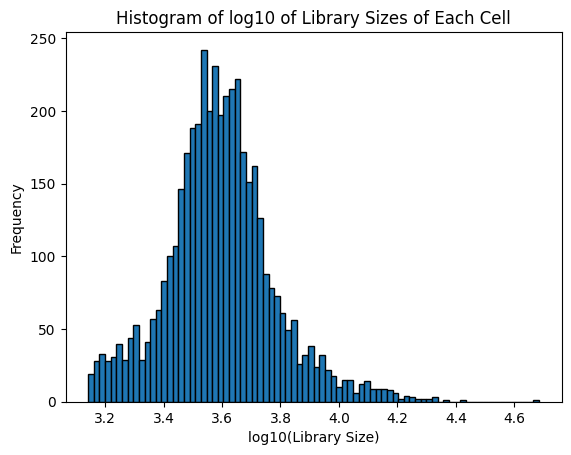

In [74]:
# Create the histogram
plt.hist(np.log10(library), bins=80, edgecolor='black')
plt.title('Histogram of log10 of Library Sizes of Each Cell')
plt.xlabel('log10(Library Size)')
plt.ylabel('Frequency')
plt.show()

In [85]:
cells_filter = (np.log10(library)< 4)

In [86]:
filtered1 = dense[cells_filter,:]
print(filtered1.shape)

(4211, 33694)


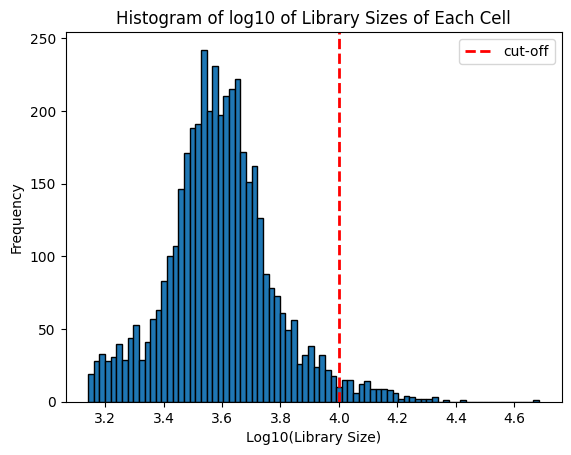

In [282]:
# Create the histogram
plt.hist(np.log10(library), bins=80, edgecolor='black')
plt.title('Histogram of log10 of Library Sizes of Each Cell')
plt.xlabel('Log10(Library Size)')
plt.ylabel('Frequency')
plt.axvline(x=4, color='red', linestyle='dashed', linewidth=2, label="cut-off")
plt.legend()
plt.show()

In [87]:
# Compute the median of library size across all cells after any filtering.
print(f"median of library size across all cells before filtering: {np.median(library)}")
print(f"median of library size across all cells after filtering: {np.median(np.sum(filtered1, axis=1))}")

median of library size across all cells before filtering: 3866.5
median of library size across all cells after filtering: 3819.0


## Q1c
Plot a histogram of log10 of the total number cells that each gene is expressed in. Is this
distribution unimodal or multimodal? If the latter, how many genes remain if you filter the lower
mode as noisy genes [5 pts]?\


In [88]:
# total number cells that each gene is expressed in
# total number of cells: 4211
# total number of genes: 33694
# should be a list of length 33694
expression = np.sum(dense, axis=0)
print(expression.shape)

(33694,)


In [91]:
# there are some genes with expression = 0
np.count_nonzero(expression)

19773

In [93]:
x = expression
print(f"Sum    = {np.sum(x)}")
print(f"Mean   = {np.mean(x)}")
print(f"Min    = {np.min(x)}")
print(f"Max    = {np.max(x)}")
print(f"Median = {np.median(x)}")
print(f"Size   = {np.size(x)}")
print(f"Count nonzero      = {np.count_nonzero(x)}")
print(f"Standard Deviation = {np.std(x)}")

Sum    = 18874824
Mean   = 560.1835341603846
Min    = 0
Max    = 941339
Median = 2.0
Size   = 33694
Count nonzero      = 19773
Standard Deviation = 7844.346689545571


In [165]:
log_expression = np.log10(expression+0.000001)

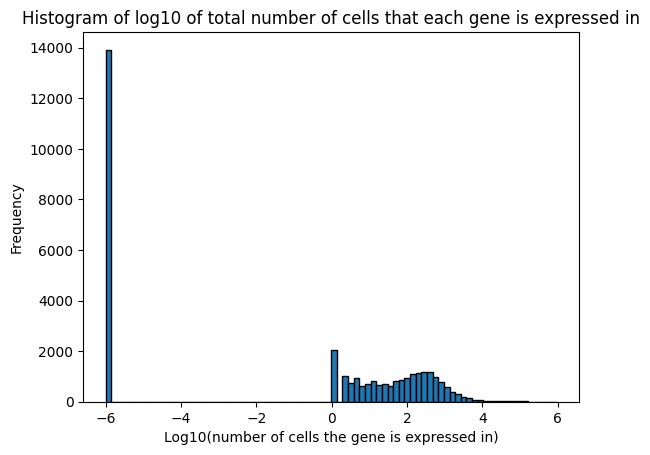

In [166]:
# Create the histogram
plt.hist(log_expression, bins=80, edgecolor='black')
plt.title('Histogram of log10 of total number of cells that each gene is expressed in')
plt.xlabel('Log10(number of cells the gene is expressed in)')
plt.ylabel('Frequency')
plt.show()

In [284]:
genes_filter0 = (log_expression>0)

In [285]:
filtered0 = dense[:,genes_filter0]
print(dense.shape)
print(filtered0.shape)

(4340, 33694)
(4340, 19773)


In [286]:
filtered_expression0 = np.sum(filtered0, axis=0)

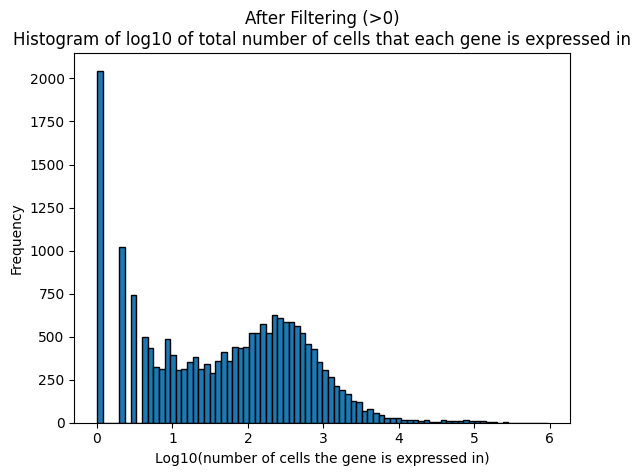

In [287]:
# Create the histogram
plt.hist(np.log10(filtered_expression0), bins=80, edgecolor='black')
plt.title('After Filtering (>0)\nHistogram of log10 of total number of cells that each gene is expressed in')
plt.xlabel('Log10(number of cells the gene is expressed in)')
plt.ylabel('Frequency')
plt.show()

In [288]:
genes_filter1 = (log_expression>1)

In [290]:
filtered1 = dense[:,genes_filter1]
print(dense.shape)
print(filtered1.shape)

(4340, 33694)
(4340, 13913)


In [291]:
filtered_expression1 = np.sum(filtered1, axis=0)

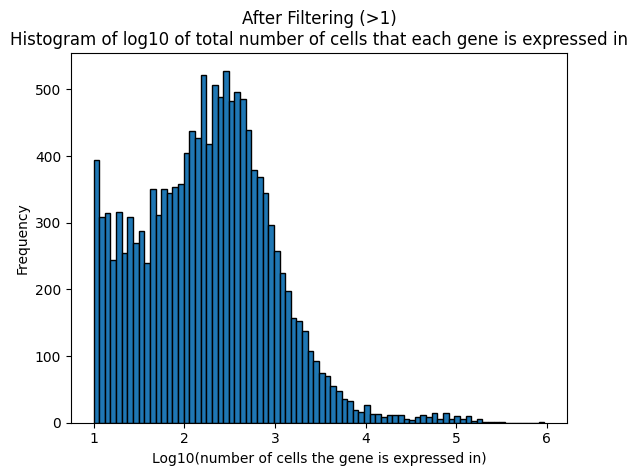

In [303]:
# Create the histogram
plt.hist(np.log10(filtered_expression1), bins=80, edgecolor='black')
plt.title('After Filtering (>1)\nHistogram of log10 of total number of cells that each gene is expressed in')
plt.xlabel('Log10(number of cells the gene is expressed in)')
plt.ylabel('Frequency')
plt.show()

In [294]:
genes_filter2 = (log_expression>1.4)

In [295]:
filtered2 = dense[:,genes_filter2]
print(dense.shape)
print(filtered2.shape)

(4340, 33694)
(4340, 11930)


In [296]:
filtered_expression2 = np.sum(filtered2, axis=0)

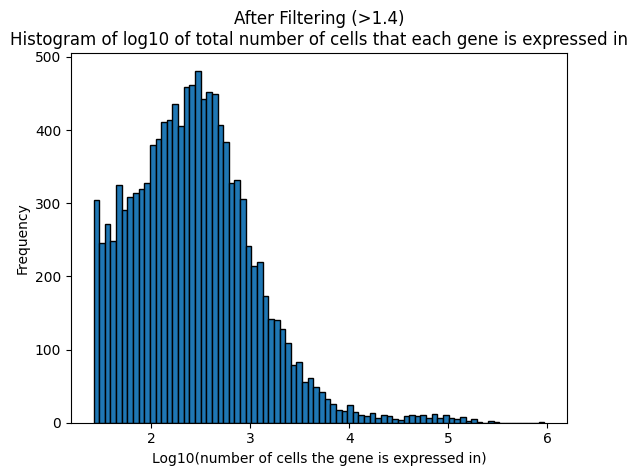

In [304]:
# Create the histogram
plt.hist(np.log10(filtered_expression2), bins=80, edgecolor='black')
plt.title('After Filtering (>1.4)\nHistogram of log10 of total number of cells that each gene is expressed in')
plt.xlabel('Log10(number of cells the gene is expressed in)')
plt.ylabel('Frequency')
plt.show()

In [298]:
genes_filter3 = (log_expression>1.5) & (log_expression<4.5)

In [299]:
filtered3 = dense[:,genes_filter3]
print(dense.shape)
print(filtered3.shape)

(4340, 33694)
(4340, 11394)


In [300]:
filtered_expression3 = np.sum(filtered3, axis=0)

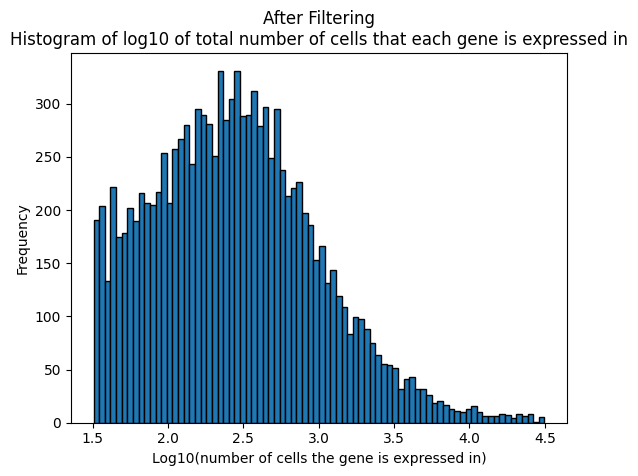

In [301]:
# Create the histogram
plt.hist(np.log10(filtered_expression3), bins=80, edgecolor='black')
plt.title('After Filtering\nHistogram of log10 of total number of cells that each gene is expressed in')
plt.xlabel('Log10(number of cells the gene is expressed in)')
plt.ylabel('Frequency')
plt.show()

In [302]:
print(f"{filtered3.shape[1]} genes after filtering")

11394 genes after filtering


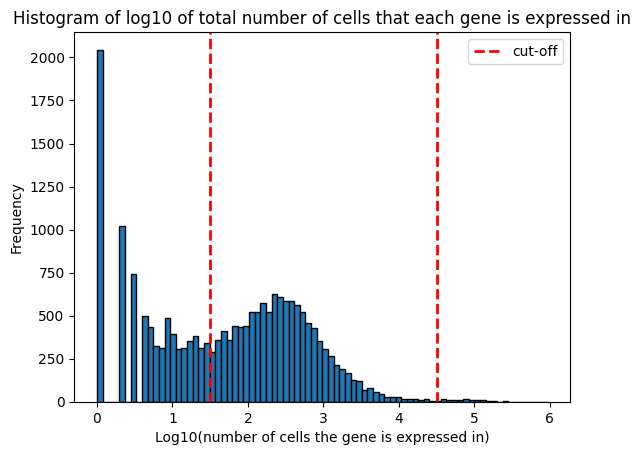

In [305]:
# Create the histogram
plt.hist(np.log10(filtered_expression0), bins=80, edgecolor='black')
plt.title('Histogram of log10 of total number of cells that each gene is expressed in')
plt.xlabel('Log10(number of cells the gene is expressed in)')
plt.ylabel('Frequency')
plt.axvline(x=1.5, color='red', linestyle='dashed', linewidth=2, label='cut-off')
plt.axvline(x=4.5, color='red', linestyle='dashed', linewidth=2)
plt.legend()
plt.show()

In [306]:
filtered = filtered3.copy()
print(filtered.shape)

(4340, 11394)


# Question2

## Q2a
Normalize the data in Q1 with global scaling to the median library size [10 pts].

In [198]:
# Note
# library2[:, np.newaxis] = library2.reshape(-1, 1)

array([[ 878],
       [1452],
       [ 867],
       ...,
       [3491],
       [1180],
       [1610]])

In [308]:
adata = sc.AnnData(filtered)

# Keep raw counts in .layers and .raw (optional but recommended
adata.layers["counts"] = adata.X.copy()   # preserve raw counts
adata.raw = adata                         # snapshot of raw (pre-HVG, pre-scale) for later

In [309]:
# Compute each cell's library size from raw counts
libsizes = np.ravel(adata.layers["counts"].sum(axis=1))
median_libsize = float(np.median(libsizes))
print(median_libsize)

1613.0


In [310]:
# Normalize total so each cell sums to the median
# This replaces adata.X with normalized values (counts scaled to target_sum)
sc.pp.normalize_total(adata, target_sum=median_libsize, layer="counts", inplace=True)

In [312]:
print(f"Library sizes before normalization: {np.sum(filtered, axis=1)}")
print(f"Library sizes after normalization: {np.ravel(adata.layers["counts"].sum(axis=1))}")

Library sizes before normalization: [ 878 1452  867 ... 3491 1180 1610]
Library sizes after normalization: [1613.0001 1613.     1613.     ... 1613.     1613.     1613.    ]


Library size has been scaled to the median library size.

## Q2b.
Embed the normalized data to 2D using t-SNE or UMAP or another dimensionality
reduction method. Compare your results with the first two principal components. Discuss the
assumptions of your method of choice [15 pts].


In [313]:
# log1p transformation to the data
sc.pp.log1p(adata)

In [314]:
# PCA
sc.tl.pca(adata, svd_solver="arpack")  # or randomized, but arpack is fine for typical sizes

# Neighbors graph on PCs (standard practice)
sc.pp.neighbors(adata, n_neighbors=15, n_pcs=50, use_rep="X_pca")  # tune n_neighbors/n_pcs to your dataset size

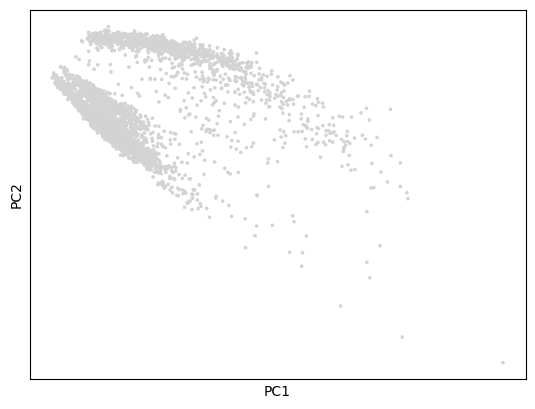

In [315]:
sc.pl.pca(adata)

### t-SNE

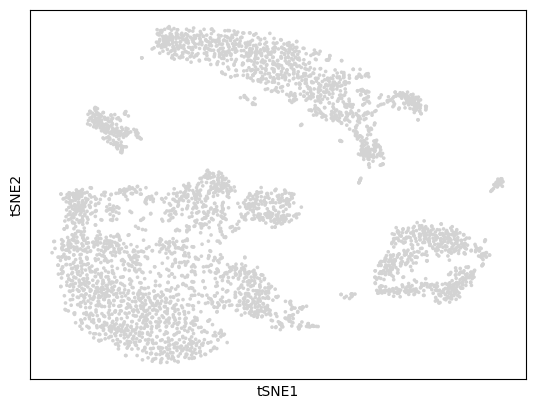

In [317]:
sc.tl.tsne(adata, use_rep="X_pca")
sc.pl.tsne(adata)

### UMAP

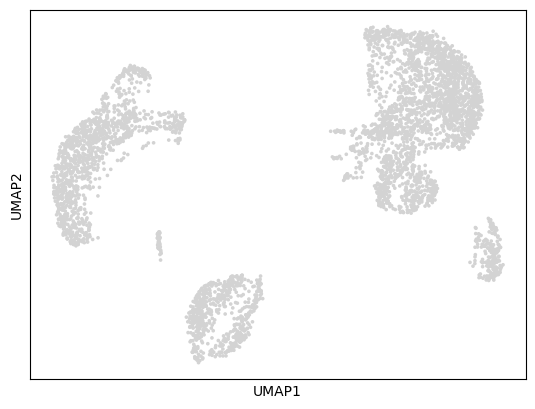

In [318]:
sc.tl.umap(adata)
sc.pl.umap(adata)

## Q2c.
Color cells in the embedded 2D map by log10 of library size. Interpret the plot [5 pts].

Interpretation: Within the clusters, there seems to be gradients of the libsizes going from one end of the spectrum to the other.

In [319]:
adata.obs["log10_libsize"] = np.log10(libsizes)

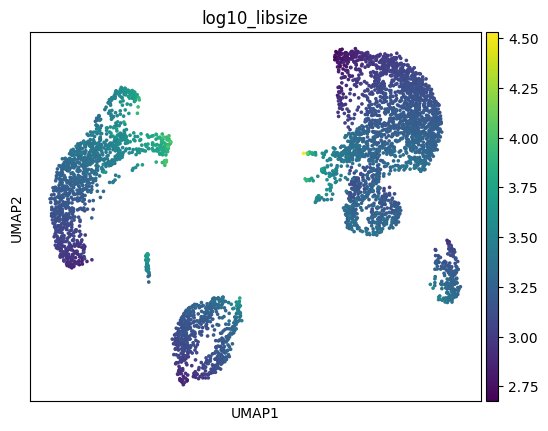

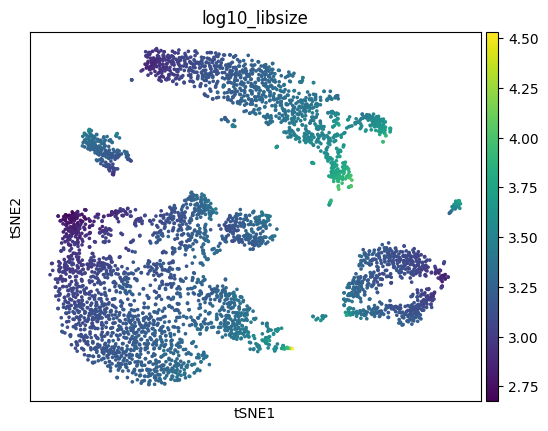

In [320]:
sc.pl.umap(adata, color="log10_libsize", cmap="viridis")
sc.pl.tsne(adata, color="log10_libsize", cmap="viridis")

## Q2d.
Color cells in the 2D map by normalized expression of major immune cell markers. Which
cell types can you detect? [Bonus 10 pts]

In [ ]:
#

# Question 3
Fit a linear regression model to expression data (after scaling to median library size
performed in Q2a) as a function of library size. Then use the model to remove (“regress out”)
any remaining effect of library size as a technical artifact and redo Q2b-c. Explain if/why you
used a regularizer [20 pts]. Limit this analysis to highly variable genes.

I didn’t use a regularizer because I regressed the expression of each gene on library size, meaning this is a single-covariate regression, repeated for each gene. Regressing out one known technical covariate (library size) is a regular OLS case: the model is stable, interpretable, and unbiased without further regularization.

In [250]:
pip install scikit-misc

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 183.6/183.6 kB 5.5 MB/s eta 0:00:00


In [251]:
# Select highly variable genes (HVGs)
sc.pp.highly_variable_genes(
    adata,
    flavor="seurat_v3",     # a robust default for scRNA-seq
    n_top_genes=3000        # common range: 2k–4k
)

# Keep only HVGs for downstream steps
adata_hvg = adata[:, adata.var["highly_variable"]].copy()

/usr/local/lib/python3.12/dist-packages/legacy_api_wrap/__init__.py:82: UserWarning: `flavor='seurat_v3'` expects raw count data, but non-integers were found.
  return fn(*args_all, **kw)


In [252]:
X_expr = adata_hvg.X  # cells × HVGs
if not isinstance(X_expr, np.ndarray):
    X_expr = X_expr.toarray()  # ensure dense for sklearn

In [264]:
libsize = np.ravel(adata_hvg.X.sum(axis=1)).reshape(-1, 1)

In [265]:
from sklearn.linear_model import LinearRegression
# Regression (vectorized: fits all genes at once)
model = LinearRegression()
model.fit(libsize, X_expr)
y_pred = model.predict(libsize)
residuals = X_expr - y_pred

# Save residuals
adata_hvg.layers["regressed"] = residuals
adata_hvg.X = residuals

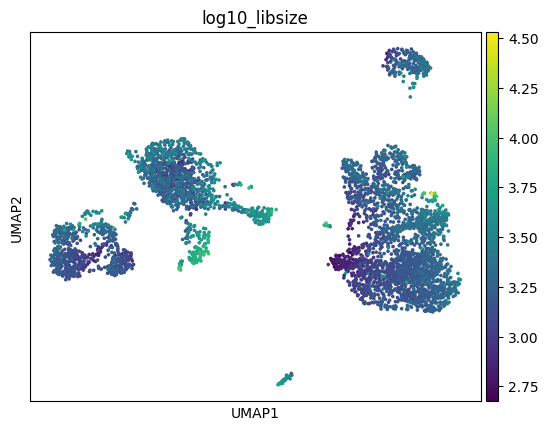

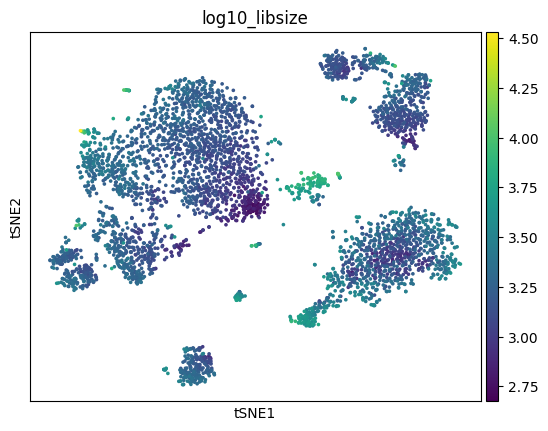

In [269]:
# Replace X with regressed data for downstream analysis
adata_hvg.X = adata_hvg.layers["regressed"]

# Recompute PCA
from sklearn.decomposition import PCA
pca = PCA(n_components=50, svd_solver="arpack")
adata_hvg.obsm["X_pca"] = pca.fit_transform(adata_hvg.X)

# Neighbors + embeddings
sc.pp.neighbors(adata_hvg, use_rep="X_pca", n_neighbors=15, n_pcs=30)
sc.tl.umap(adata_hvg)
sc.tl.tsne(adata_hvg, use_rep="X_pca")

# Plots again (as in Q2b-c)
sc.pl.umap(adata_hvg, color=["log10_libsize"])
sc.pl.tsne(adata_hvg, color=["log10_libsize"])

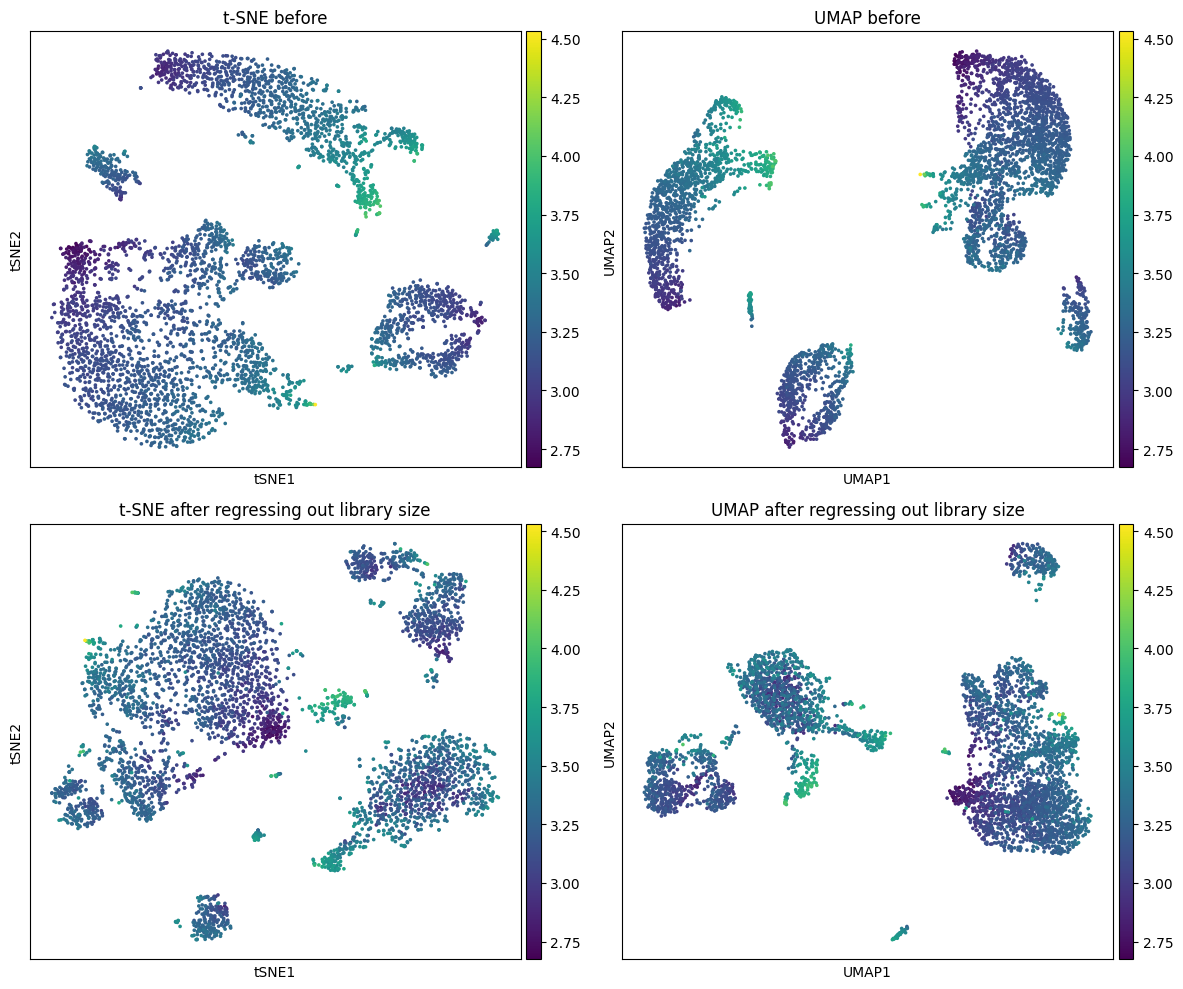

In [321]:
# View All 4
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

# Before regression
sc.pl.tsne(adata, color="log10_libsize", ax=axes[0, 0], show=False, title="t-SNE before")
sc.pl.umap(adata, color="log10_libsize", ax=axes[0, 1], show=False, title="UMAP before")

# After regressing out
sc.pl.tsne(adata_hvg, color="log10_libsize", ax=axes[1, 0], show=False, title="t-SNE after regressing out library size")
sc.pl.umap(adata_hvg, color="log10_libsize", ax=axes[1, 1], show=False, title="UMAP after regressing out library size")

plt.tight_layout()
plt.show()
